# First-passage stochastic functionals for Ornstein-Uhlenbeck process

## Packages and libraries

In [2]:
import numpy                       as np
import matplotlib.pyplot           as plt
from   scipy                       import integrate, special
from   mpmath                      import *
from scipy.optimize                import curve_fit

## The potential function

In [4]:
def dV(x,n):
    if x>=0:
        return -n*abs(x)**(int(n-1))
    else:
        return n*abs(x)**(int(n-1))

## Universal parameters throuough the whole project

In [5]:
D   = 1
std = 1

## Position as a function of time

#### Simple X(t)

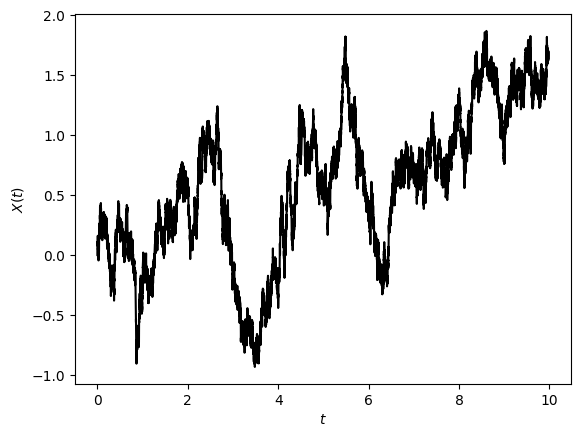

In [8]:
### Time parameters ###
N    = 50000
h    = 10**(-3.7)
time = np.linspace(0,N*h,N) 
### Process parameters ###
n    = 2
a    = 0 
X_0  = 0
### Initialization ###
X    = np.empty(N)
X[0] = X_0
### OU Process ### 
for i in range(N-1):
    X[i+1] = X[i] + 0.5*a*h*dV(X[i],n)+np.sqrt(h*D)*np.random.normal(0,std)
### Plot ###
plt.plot(time, X, zorder = 10, color='black')
plt.xlabel(r'$t$')
plt.ylabel(r'$X(t)$')
plt.show()
### Save figure ###
# plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/a=0.png', dpi=500)

####  X(t) with several a values

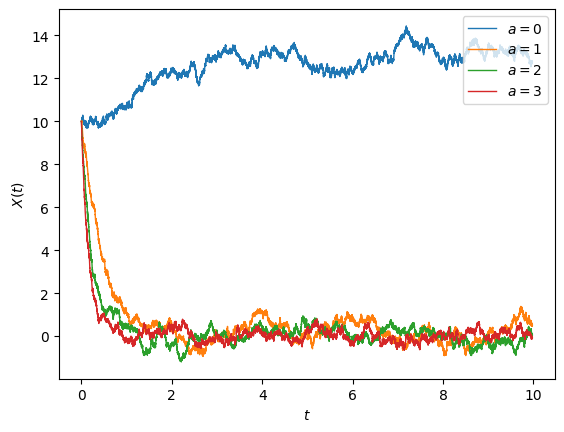

In [21]:
### Time parameters ###
N    = 50000
h    = 10**(-3.7)
time = np.linspace(0,N*h,N)

### Process parameters ###
M    = 4
n    = 2
a    = 0 
X_0  = 10 

### Initialization ###
X    = np.empty(N)
X[0] = X_0

### OU Process ### 
for j in range(M):
    for i in range(N-1):
        X[i+1]=X[i]+j*h*dV(X[i],n)+np.sqrt(h*D)*np.random.normal(0,std)
        
### Plot ###
    plt.plot(time, X, label=rf'$a={j}$', linewidth=1)
plt.legend(loc='upper right')
plt.xlabel(r'$t$')
plt.ylabel(r'$X(t)$')
plt.show()

### Save figure ###
# plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/Several_a.png', dpi = 500)

#### First and second moments of the position

1000 iterations left
500 iterations left


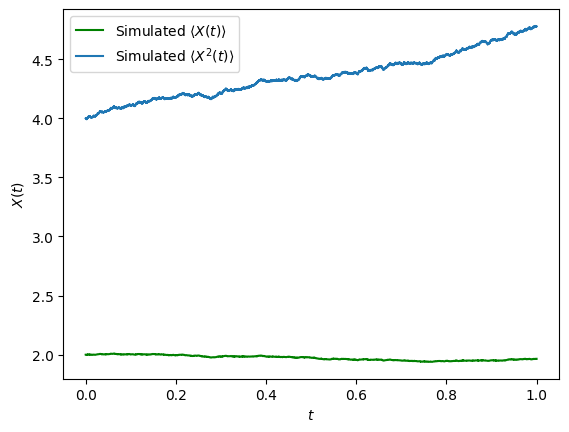

In [22]:
### Time parameters ###
N    = 10000
h    = 10**(-4)
time = np.linspace(h,h*N,N)

### Process parameters ###
M    = 1000
n    = 2
a    = 0
X_0  = 2

### Initialization ###
X      = np.empty((M,N))
X2     = np.empty((M,N))
Xmean  = np.empty(N)
X2mean = np.empty(N)
X[:,0] = X_0
X2[:,0]= X_0**2

### OU process ###
for j in range(M):
    for i in range(N-1):
        X[j][i+1]  = X[j][i]+a*h*dV(X[j][i],n)+np.sqrt(h*D)*np.random.normal(0,std)
        X2[j][i+1] = X[j][i+1]**2
    if(j%500==0): print(f'{(M-j)} iterations left')
        
### Calculation of the mean ###
Xmean  = np.mean(X,axis=0)
X2mean = np.mean(X2,axis=0)

### Plotting the simulated curve ###
plt.plot(time,Xmean , label='Simulated '+r'$\langle X(t)\rangle$', color='green')
plt.plot(time,X2mean, label='Simulated '+r'$\langle X^2(t)\rangle$')

### Plotting theoretical a=0 (uncomment it if you want to make use of it) ###
# plt.plot(time,X_0*time/time, label=r'$\langle X(t)\rangle = x_0$', color='black', linewidth=1)
# plt.plot(time, D*time+(X_0**2)*np.exp(-2*a*time), label=r'$\langle X^2(t)\rangle = Dt+x_0^{2}$', color='grey', linewidth=1)

### Plotting theoretical a=1 (uncomment it if you want to make use of it) ###
# plt.plot(time,X_0*np.exp(-a*time), label=r'$\langle X(t)\rangle = x_0e^{-at}$', color='black', linewidth=1)
# plt.plot(time,(D*(1-np.exp(-2*a*time))/(2*a))+(X_0**2)*np.exp(-2*a*time), label=r'$\langle X^2(t)\rangle = \frac{D}{2a}\left(1-e^{-2at}\right)+x_0^2 e^{-2at}$', color='grey', linewidth=1)

### Other plot specifications ###
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$X(t)$')
plt.show()

### Save figure ###
# plt.savefig(f'C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/Mean_Squaredmean_a={a}.png', dpi = 500)

#### Propagator

30000 iterations left
29000 iterations left
28000 iterations left
27000 iterations left
26000 iterations left
25000 iterations left
24000 iterations left
23000 iterations left
22000 iterations left
21000 iterations left
20000 iterations left
19000 iterations left
18000 iterations left
17000 iterations left
16000 iterations left
15000 iterations left
14000 iterations left
13000 iterations left
12000 iterations left
11000 iterations left
10000 iterations left
9000 iterations left
8000 iterations left
7000 iterations left
6000 iterations left
5000 iterations left
4000 iterations left
3000 iterations left
2000 iterations left
1000 iterations left


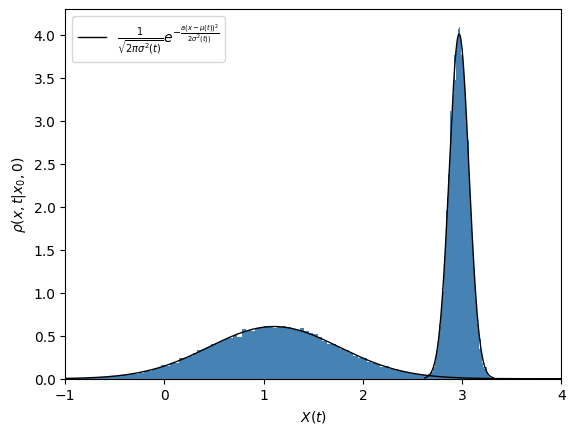

In [62]:
##### Time parameters ###
N    = 1000
h    = 10**(-3)
time = np.linspace(0,N*h,N)

### Process parameters ###
M    = 30000
n    = 2
a    = 1
X_0  = 3

### Statistical parameters of the process ###
mu     = X_0*np.exp(-a*time)
sigma2 = (D/(2*a))*(1-np.exp(-2*a*time))

### Initialization ###
X       = np.empty((M,N))
X_fixed = np.empty(M)
X[:,0]  = X_0

### OU process ###
for j in range(M):
    for i in range(N-1):
        X[j][i+1] = X[j][i] +0.5*a*h*dV(X[j][i],n)+np.sqrt(h*D)*np.random.normal(0,std)
    if(j%1000==0): print(f'{(M-j)} iterations left')

### Obtaining the probability distribution for the last time iteration ###
X_fixed[:]=X[:,-1]

### Plot ###
plt.hist(X[:,-1], bins=120, density="True", color='steelblue')
plt.hist(X[:,10], bins=120, density="True", color='steelblue')

x1   = np.linspace(mu[-1]-20*sigma2[-1],mu[-1]+20*sigma2[-1],1000) 
plt.plot(x1,(1/np.sqrt(2*np.pi*sigma2[-1]))*np.exp(-(a*(x1-mu[-1])**2)/(2*sigma2[-1])), label=r'$\frac{1}{\sqrt{2\pi\sigma^2(t)}}e^{-\frac{a(x-\mu(t))^2}{2\sigma^2(t))}}$', color='black', linewidth=1)
x2   = np.linspace(mu[10]-35*sigma2[10],mu[10]+35*sigma2[10],1000) 
plt.plot(x2,(1/np.sqrt(2*np.pi*sigma2[10]))*np.exp(-(a*(x2-mu[10])**2)/(2*sigma2[10])), color='black', linewidth=1)
plt.legend()
plt.xlim(-1,4)
plt.xlabel(r'$X(t)$')
plt.ylabel(r'$\rho(x,t|x_0,0)$')
# plt.show()

### Save figure ###
plt.savefig(f'C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/Position_distribution for t={time[10]} and t={time[-1]}.png', dpi = 500)

## First-passage time

#### Saving txts files 

Process a=0.1
Process a=0.15
Process a=0.2
Process a=0.25
Process a=0.3
Process a=0.35
Process a=0.4
Process a=0.45
Process a=0.5
Process a=0.55
Process a=0.6
Process a=0.65
Process a=0.7
Process a=0.75
Process a=0.8
Process a=0.85
Process a=0.9
Process a=0.95
Process a=1.0
Process a=1.5
Process a=2.0
Process a=2.5
Process a=3.0
Process a=3.5
Process a=4.0
Process a=4.5
Process a=5.0
Process a=5.5
Process a=6.0
Process a=6.5
Process a=7.0
Process a=7.5
Process a=8.0
Process a=8.5
Process a=9.0
Process a=9.5
Process a=10.0
Process a=10.5
Process a=11.0
Process a=11.5
Process a=12.0
Process a=12.5
Process a=13.0
Process a=13.5
Process a=14.0
Process a=14.5
Process a=15.0
Process a=15.5
Process a=16.0
Process a=16.5
Process a=17.0
Process a=17.5
Process a=18.0
Process a=18.5
Process a=19.0
Process a=19.5
Process a=20.0
Process a=20.5
Process a=21.0
Process a=21.5
Process a=22.0
Process a=22.5
Process a=23.0
Process a=23.5
Process a=24.0
Process a=24.5
Process a=25.0
Process a=25.5
Process

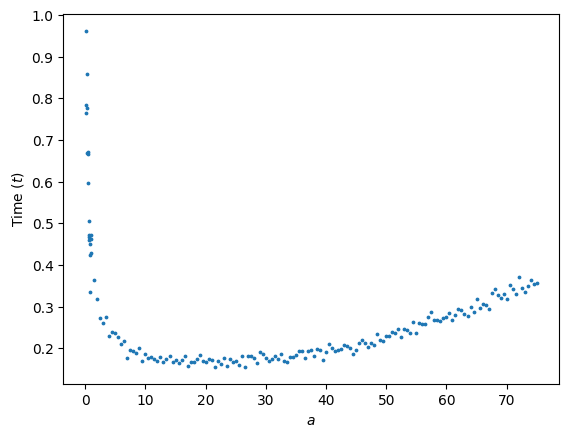

In [42]:
### Time parameters ###
N       = 200000
h       = 10**(-4)

### Process parameters ###
M       = 500
n       = 2
a       = 1
X_0     = 0.0
X_f     = 0.2

### n,a and mfpt linspaces ###
a1_axis = np.round(np.linspace(0.1,1,19), decimals=2)

    ### a2 FPT x_0>L ###
# a2_axis = np.round(np.linspace(1.5,30,58), decimals=1)
    ### a2 FPT x_0<L ###
a2_axis = np.round(np.linspace(1.5,75,148), decimals=2)

a_axis  = np.concatenate((a1_axis,a2_axis), axis=0)
mfpt    = np.empty(len(a_axis))

### Iterating over a ###
for index_a, a in enumerate(a_axis):

### Initialization ###
    fpt    = []
    X      = np.empty((M,N))
    X[:,0] = X_0
        
### OU process ###
    for j in range(M):
        for i in range(N-1):
            X[j][i+1]=X[j][i]+0.5*a*h*dV(X[j][i],n)+np.sqrt(h*D)*np.random.normal(0,std)
            if(X[j][i]>=X_f):
                fpt.append(float(i*h))
                break
        if(j%M==0):
            print(f'Process a={a}')
                
### Creating the mean fpt array ###                
    mfpt[index_a]=np.mean(fpt)

### Saving a txt file for each n with a variable ###
np.savetxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/MFPT/mfpt(x_0={X_0},x_f={X_f},n={n}).txt", mfpt)

### Plot ###
plt.scatter(a_axis,mfpt, s=3)
plt.xlabel(r'$a$')
plt.ylabel('Time 'r'$(t)$')
plt.show()

### Save figure ###
# plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/MFPT_vs_a_n=2.png', dpi=500)

#### MFPT as a  function of a (just plotting)

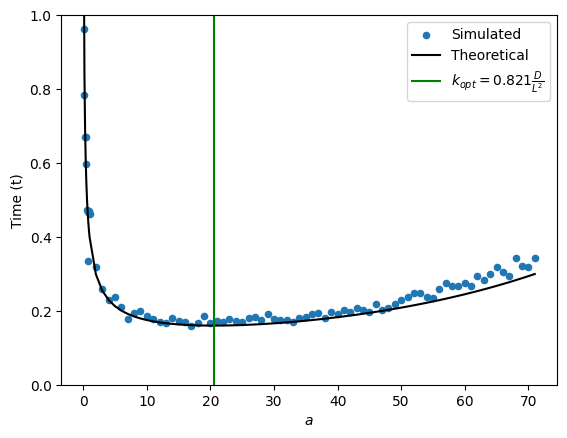

In [265]:
### process parameter ###
n   = 2
X_0 = 0.0
X_f = 0.2

### a linspace ###

### a1 ###
a1     = np.round(np.linspace(0.1,1,19), decimals=2)
    ### a2 FPT x_0>L ###
# a2 = np.round(np.linspace(1.5,30.0,58), decimals=1)

    ### a2 FPT x_0<L ###
a2     = np.round(np.linspace(1.5,100,198), decimals=1)

a = np.concatenate((a1,a2), axis=0)


sim    =[]
th     =[]
aprox  =[]

### Loading the txt file ###
sim = np.loadtxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/MFPT/mfpt(x_0={X_0},x_f={X_f},n={n}).txt")

### Theoretical curve ###
for i in a:
    f = lambda y: np.sqrt(np.pi) * np.exp(y**2)*special.erfc(-y)/i
    result, error = integrate.quad(f, X_0*np.sqrt(i),X_f*np.sqrt(i))
    th.append(result)

    ### Limit for x_0>L ###
# lim = -1
    ### Limit for x_0<L ###
lim = 160

### Plot ###

    ### Simulted ###
plt.scatter(a[:lim:2],sim[:lim:2], label='Simulated', s=20)
    ### Theoretical ###
plt.plot(a[:lim:2],th[:lim:2], label='Theoretical', color='black')
    ### Approximations ###
    
        ### x_0<L ###
            ### a small ###
# plt.plot(a[:lim],np.sqrt(np.pi/a[:lim])*(X_f-X_0), label=r'$\sqrt{\frac{\pi}{aD}}(L-x_0)$', color='green')
            ### a large ###
# plt.plot(a[:lim],np.sqrt(np.pi)*np.exp((X_f**2)*a[:lim])/(a[:lim]**(3/2)*X_f), label=r'$\sqrt{\pi}\frac{e^{\frac{aL^2}{D}}}{La^{3/2}}$', color='green')
plt.axvline(0.821/X_f**2, label=r'$k_{opt}=0.821\frac{D}{L^{2}}$', color='green')


        ### x_0>L ###
            ### a small ###
# plt.plot(a,np.sqrt(np.pi/a)*(x_0-x_f), label=r'$\sqrt{\frac{\pi}{aD}}(x_0-L)$', color='green')
            ### a large ###
# plt.plot(a[2:],np.log(x_0/x_f)/a[2:], label=r'$\frac{\ln(x_0/L)}{a}$', color='green')

    ### Other plot specifications ###
plt.xlabel(r'$a$')
plt.ylabel('Time '+r'(t)')
plt.ylim(0,1)
plt.legend()
# plt.show()

### Save figure ###
plt.savefig(f'C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/MFPT_vs_a.Optimal_value_x0={X_0}_xf={X_f}.png', dpi=500)

### Optimal value

In [261]:
### Time parameters ###
N       = 200000
h       = 10**(-5)

### Process parameters ###
M       = 1500
n       = 2
a       = 1
X_0     = 0.0
X_f     = 0.2


a_axis = np.round(np.linspace(0.1,70,70), decimals=3)

mfpt    = np.empty(len(a_axis))

### Iterating over a ###
for index_a, a in enumerate(a_axis):

### Initialization ###
    fpt    = []
    X      = np.empty((M,N))
    X[:,0] = X_0
        
### OU process ###
    for j in range(M):
        for i in range(N-1):
            X[j][i+1]=X[j][i]+0.5*a*h*dV(X[j][i],n)+np.sqrt(h*D)*np.random.normal(0,std)
            if(X[j][i+1]>=X_f):
                fpt.append(float((i+1)*h))
                break
        if(j%M==0):
            print(f'Process a={a}')
                
### Creating the mean fpt array ###                
    mfpt[index_a]=np.mean(fpt)

### Saving a txt file for each n with a variable ###
np.savetxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/MFPT/mfpt_aopt(x_0={X_0},x_f={X_f},n={n}).txt", mfpt)

Process a=0.1
Process a=1.113
Process a=2.126
Process a=3.139
Process a=4.152
Process a=5.165
Process a=6.178
Process a=7.191
Process a=8.204
Process a=9.217
Process a=10.23
Process a=11.243
Process a=12.257
Process a=13.27
Process a=14.283
Process a=15.296
Process a=16.309
Process a=17.322
Process a=18.335
Process a=19.348
Process a=20.361
Process a=21.374
Process a=22.387
Process a=23.4
Process a=24.413
Process a=25.426
Process a=26.439
Process a=27.452
Process a=28.465
Process a=29.478
Process a=30.491
Process a=31.504
Process a=32.517
Process a=33.53
Process a=34.543
Process a=35.557
Process a=36.57
Process a=37.583
Process a=38.596
Process a=39.609
Process a=40.622
Process a=41.635
Process a=42.648
Process a=43.661
Process a=44.674
Process a=45.687
Process a=46.7
Process a=47.713
Process a=48.726
Process a=49.739
Process a=50.752
Process a=51.765
Process a=52.778
Process a=53.791
Process a=54.804
Process a=55.817
Process a=56.83
Process a=57.843
Process a=58.857
Process a=59.87
Pr

#### Plotting the optimal value

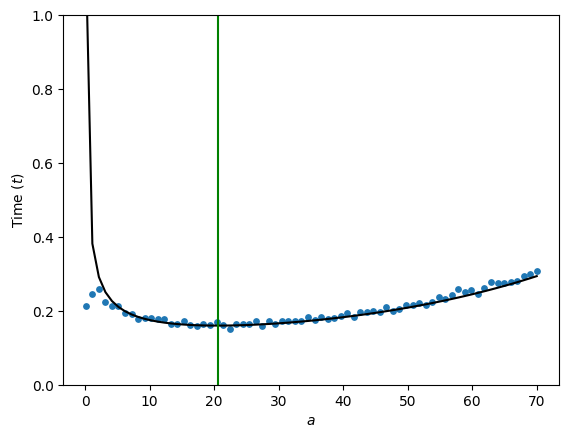

In [262]:
mfpt = np.loadtxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/MFPT/mfpt_aopt(x_0={X_0},x_f={X_f},n={n}).txt")

th = []

for i in a_axis:
    f = lambda y: np.sqrt(np.pi) * np.exp(y**2)*special.erfc(-y)/i
    result, error = integrate.quad(f, X_0*np.sqrt(i),X_f*np.sqrt(i))
    th.append(result)

plt.scatter(a_axis,mfpt, s=15)
plt.plot(a_axis,th, color='black')
plt.axvline(0.821/X_f**2, label=r'$k_{opt}=0.821\frac{D}{L^{2}}$', color='green')
plt.xlabel(r'$a$')
plt.ylabel('Time 'r'$(t)$')
plt.ylim(0,1)
plt.show()

#### Reading the optimal value

In [263]:
mfpt  = np.loadtxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/MFPT/mfpt_aopt(x_0={X_0},x_f={X_f},n={n}).txt")
means = np.empty(len(mfpt)-2)
for i in range(len(mfpt)):
    if(i<len(mfpt)-2):
        means[i]=np.mean([mfpt[i],mfpt[i+1],mfpt[i+2]])
a_axis[np.argmin(means)+1]

22.387

### Area till the first-passage time

In [384]:
N   = 10000
M   = 50000
 
x_0 = 5.0
x_f = 0.0
h   = 10**(-3)             

time=np.linspace(0,h*N,N) 

a = np.linspace(1,1,1)

colors1 = ['orangered', 'cornflowerblue', 'greenyellow']
colors2 = ['red', 'skyblue', 'lime']

for k in a:
    X=np.empty((M,N))
    acum = []
    for j in range(M):
        X[j][0]=x_0
    for j in range(M):
        for i in range(N-1):
            X[j][i+1]=X[j][i]+0.5*k*h*dV(X[j][i],n)+np.sqrt(h*D)*np.random.normal(0,std)
            if(X[j][i+1]<=x_f): 
                break
        acum.append(h*np.nansum(X[j][:i]))
        if(j%500==0): print(f'There are {M-j} iterations left')
    if(j==M): print('The simulation has overpassed the time limit') 

#     plt.plot(time[:i], X[j][:i],color=colors2[j], alpha=1, zorder =1, linewidth = 5)
#     plt.fill_between(time[:i], X[j][:i],color=colors1[j], alpha=0.6, zorder =10)
# plt.ylabel(r'$X(t)$')
# plt.xlabel(r'$t$')
# plt.show()
# plt.savefig(f'C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/AuC_Position.png', dpi=500)

np.savetxt(f'C:/Users/sergi/OneDrive/Escritorio/TFM/txts/AuC/AuC_a={k}_x0={x_0}.txt', acum)

There are 50000 iterations left
There are 49500 iterations left
There are 49000 iterations left
There are 48500 iterations left
There are 48000 iterations left
There are 47500 iterations left
There are 47000 iterations left
There are 46500 iterations left
There are 46000 iterations left
There are 45500 iterations left
There are 45000 iterations left
There are 44500 iterations left
There are 44000 iterations left
There are 43500 iterations left
There are 43000 iterations left
There are 42500 iterations left
There are 42000 iterations left
There are 41500 iterations left
There are 41000 iterations left
There are 40500 iterations left
There are 40000 iterations left
There are 39500 iterations left
There are 39000 iterations left
There are 38500 iterations left
There are 38000 iterations left
There are 37500 iterations left
There are 37000 iterations left
There are 36500 iterations left
There are 36000 iterations left
There are 35500 iterations left
There are 35000 iterations left
There ar

#### First and Second moment

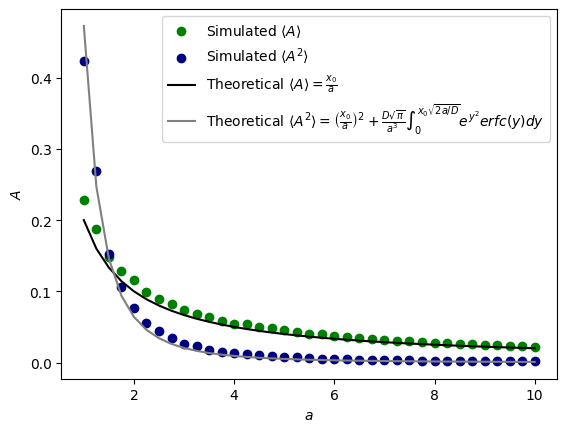

In [6]:
lista = np.linspace(1,10,37)
# lista = [1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5]
sim      =[]
sim2     =[]
th       =[]

x_0=0.2

for i in lista:
    with open(f'C:/Users/sergi/OneDrive/Escritorio/TFM/txts/AuC/AuC_a={i}.txt') as f:
        lines = f.readlines()
        Auc=[]
        Auc2=[]
        for lines in lines:
            Auc.append(float(lines))
            Auc2.append(float(lines)**2)
            
    f = lambda y: np.sqrt(np.pi) * np.exp(y**2) * special.erfc(y)/(i**3)
    result, error = integrate.quad(f, 0,x_0*np.sqrt(2))  
    th.append((x_0/i)**2 + result)
    
    sim.append(np.mean(Auc))
    sim2.append(np.mean(Auc2))
b=0

plt.scatter(lista[b:],sim[b:], label='Simulated '+r'$\langle A \rangle$', color='green')
plt.scatter(lista[b:], sim2[b:], label='Simulated '+r'$\langle A^{2} \rangle$', color='navy')
plt.plot(lista[b:], x_0/lista[b:], label='Theoretical '+r'$\langle A \rangle=\frac{x_0}{a}$', color='black')
plt.plot(lista[b:], th[b:], label='Theoretical '+r'$\langle A^{2} \rangle=\left(\frac{x_{0}}{a}\right)^{2}+\frac{D\sqrt{\pi}}{a^{3}}\int_{0}^{x_{0}\sqrt{2a/D}}e^{y^{2}}erfc(y)dy$', color='gray')
plt.xlabel(r'$a$')
plt.ylabel(r'$ A $')
plt.legend()
# plt.show()
plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/A_Moments_vs_a.png', dpi=500)

#### PDF 

Text(0, 0.5, '$\\rho(A)$')

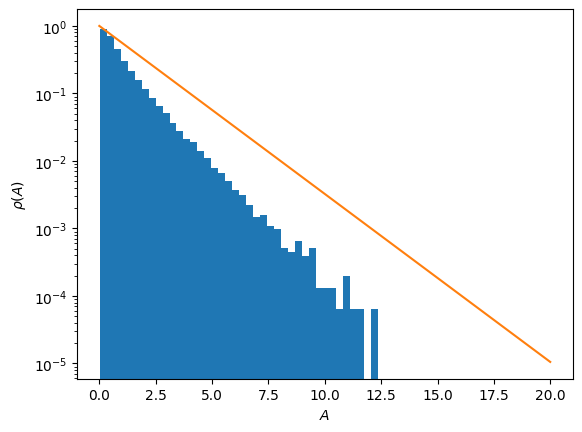

In [396]:
x_0 = 1.0
a   = 1.0

acum = np.loadtxt(f'C:/Users/sergi/OneDrive/Escritorio/TFM/txts/AuC/AuC_a={a}_x0={x_0}.txt')
x = np.linspace(0.0001,20,1000)
gamma = 0.573

plt.hist(acum, density=True, bins=40)
plt.plot(x,np.exp(-gamma*x))
plt.yscale('log')
plt.xlabel(r'$A$')
plt.ylabel(r'$\rho(A)$')

### Residence Time

In [26]:
N = 100000
M = 10000
h = 10**(-4)   

X_0    = 0.1
X_f    = 0.0
X_r    = 0.2

a = np.round(np.linspace(1,20,39), decimals=1)
resdtmean = []

for k in a:
    X=np.empty((M,N))
    resdt = []
    for j in range(M):
        X[j][0]=X_0
    for j in range(M):
        count=0
        for i in range(N-1):
            X[j][i+1]=X[j][i]-0.5*n*k*h*(X[j][i]**(n-1))+np.sqrt(h*D)*np.random.normal(0,std)
            if(X[j][i]>=X_r):
                count+=h
            if(X[j][i]<=X_f):
                resdt.append(count)
                break
        if(j%1000==0):
            print(f'{(M-j)} iterations left for a={k}')
            
    resdtmean.append(np.mean(resdt))       
np.savetxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/RESDT/resdt(x_0={X_0},x_f={X_f},x_r={X_r}).txt", resdtmean)

10000 iterations left for a=1.0
9000 iterations left for a=1.0
8000 iterations left for a=1.0
7000 iterations left for a=1.0
6000 iterations left for a=1.0
5000 iterations left for a=1.0
4000 iterations left for a=1.0
3000 iterations left for a=1.0
2000 iterations left for a=1.0
1000 iterations left for a=1.0
10000 iterations left for a=1.5
9000 iterations left for a=1.5
8000 iterations left for a=1.5
7000 iterations left for a=1.5
6000 iterations left for a=1.5
5000 iterations left for a=1.5
4000 iterations left for a=1.5
3000 iterations left for a=1.5
2000 iterations left for a=1.5
1000 iterations left for a=1.5
10000 iterations left for a=2.0
9000 iterations left for a=2.0
8000 iterations left for a=2.0
7000 iterations left for a=2.0
6000 iterations left for a=2.0
5000 iterations left for a=2.0
4000 iterations left for a=2.0
3000 iterations left for a=2.0
2000 iterations left for a=2.0
1000 iterations left for a=2.0
10000 iterations left for a=2.5
9000 iterations left for a=2.5
8000

#### RESDT as a function of a

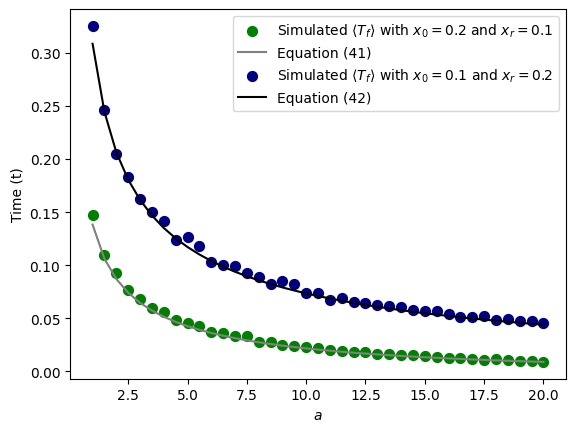

In [7]:
a = np.round(np.linspace(1,20,39), decimals=1)

sim1      =[]
th1       =[]

X_0 = 0.1
X_f = 0.0
X_r = 0.2

sim1 = np.loadtxt(f'C:/Users/sergi/OneDrive/Escritorio/TFM/txts/RESDT/resdt(x_0={X_0},x_f={X_f},x_r={X_r}).txt')
for i in a:
    th1.append((np.pi/(2*i)*special.erfc(X_r*np.sqrt(i))*(special.erfi(X_0*np.sqrt(i))-special.erfi(X_f*np.sqrt(X_f*np.sqrt(i))))))   

plt.scatter(a,sim1, label='Simulated '+r'$\langle T_f\rangle$'+ ' with ' + r'$x_0=0.2$'+' and '+r'$x_r=0.1$', color='green', s=50)
plt.plot(a,th1, label='Equation (41)', color='gray')


sim2      =[]
th2       =[]

X_0 = 0.2
X_f = 0.0
X_r = 0.1

sim2 = np.loadtxt(f'C:/Users/sergi/OneDrive/Escritorio/TFM/txts/RESDT/resdt(x_0={X_0},x_f={X_f},x_r={X_r}).txt')
for i in a:
    f = lambda y: np.exp(y**2)*special.erfc(y)
    result, error = integrate.quad(f, X_r*np.sqrt(i),X_0*np.sqrt(i))
    th2.append((np.pi/(2*i)*special.erfc(X_r*np.sqrt(i))*(special.erfi(X_r*np.sqrt(i))-special.erfi(X_f*np.sqrt(X_f*np.sqrt(i)))))+np.sqrt(np.pi)*result/i)

plt.scatter(a,sim2, label='Simulated '+r'$\langle T_f\rangle$'+ ' with ' + r'$x_0=0.1$'+' and '+r'$x_r=0.2$', color = 'navy',s=50)  
plt.plot(a,th2, label='Equation (42)', color='black')



plt.xlabel(r'$a$')
plt.ylabel('Time '+r'(t)')
plt.legend()
# plt.show()
plt.savefig(f'C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/RESDT_vs_a.png', dpi=500)

### NStudy 

3 iterations left 
3 iterations left 
3 iterations left 
3 iterations left 


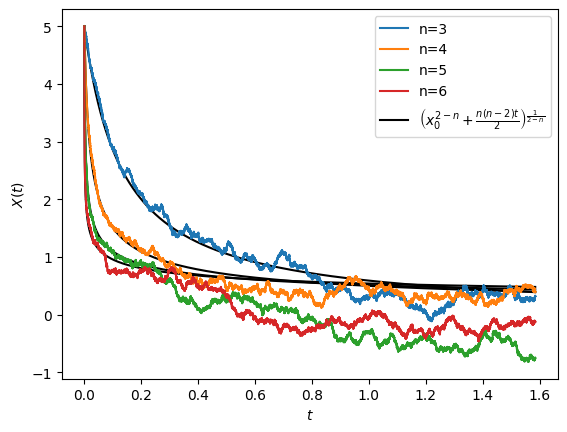

In [149]:
M   = 3
N   = 100000
X_0 = 5
h   = 10**(-4.8)         
a   = 1


time=np.linspace(0,N*h,N) 
lista=[3,4,5,6]


for k in lista:
    X=np.empty((M,N))
    for j in range(M):
        X[j][0]=X_0
        for i in range(N-1):
            X[j][i+1] = X[j][i] + 0.5*a*h*dV(X[j][i],k)+np.sqrt(h*D)*np.random.normal(0,std)
        if(j==0): print(f"{M} iterations left ")
    X = np.mean(X[:,:], axis=0)
    plt.plot(time, X, label=f'n={k}', zorder = 10)
    if(k!=6):
        plt.plot(time, (X_0**(2-k)+(k-2)*(k/2)*time)**(1/(2-k)), color='black', zorder=1)
        plt.legend()
        plt.xlabel(r'$t$')
        plt.ylabel(r'$X(t)$')
    else:
        plt.plot(time, (X_0**(2-k)+(k-2)*(k/2)*time)**(1/(2-k)), color='black', label = r'$\left(x_0^{2-n}+\frac{n(n-2)t}{2}\right)^{\frac{1}{2-n}}$', zorder=1)
        plt.legend()

plt.show()
# plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/Position_for_several_n.png', dpi=500)

Process a=1.0, n=4.0
Process a=4.34, n=4.0
Process a=7.68, n=4.0
Process a=11.02, n=4.0
Process a=14.36, n=4.0
Process a=17.71, n=4.0
Process a=21.05, n=4.0
Process a=24.39, n=4.0
Process a=27.73, n=4.0
Process a=31.07, n=4.0
Process a=34.41, n=4.0
Process a=37.75, n=4.0
Process a=41.09, n=4.0
Process a=44.43, n=4.0
Process a=47.78, n=4.0
Process a=51.12, n=4.0
Process a=54.46, n=4.0
Process a=57.8, n=4.0
Process a=61.14, n=4.0
Process a=64.48, n=4.0
Process a=67.82, n=4.0
Process a=71.16, n=4.0
Process a=74.51, n=4.0
Process a=77.85, n=4.0
Process a=81.19, n=4.0
Process a=84.53, n=4.0
Process a=87.87, n=4.0
Process a=91.21, n=4.0
Process a=94.55, n=4.0
Process a=97.89, n=4.0
Process a=101.23, n=4.0
Process a=104.58, n=4.0
Process a=107.92, n=4.0
Process a=111.26, n=4.0
Process a=114.6, n=4.0
Process a=117.94, n=4.0
Process a=121.28, n=4.0
Process a=124.62, n=4.0
Process a=127.96, n=4.0
Process a=131.3, n=4.0
Process a=134.65, n=4.0
Process a=137.99, n=4.0
Process a=141.33, n=4.0
Proce

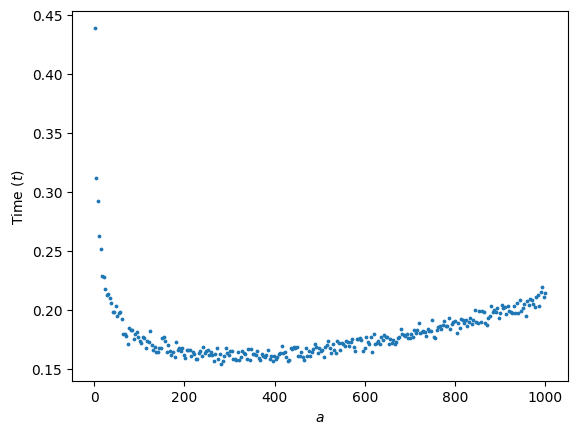

In [58]:
### Time parameters ###
N       = 200000
h       = 10**(-3.2)

### Process parameters ###
M       = 2000
X_0     = 0.0
X_f     = 0.2

### n,a and mfpt linspaces ###
a_axis = np.round(np.linspace(1,1000,300), decimals=2)

n_axis  = np.round(np.linspace(4,4,1),decimals=3)                    
mfpt    = np.empty((len(n_axis), len(a_axis)))

### Iterating over n and a ###
for index_n, n in enumerate(n_axis):
    for index_a, a in enumerate(a_axis):
        
### Initialization ###
        fpt    = []
        X      = np.empty((M,N))
        X[:,0] = X_0
        
### OU process ###
        for j in range(M):
            for i in range(N-1):
                X[j][i+1]=X[j][i]+0.5*a*h*dV(X[j][i],n)+np.sqrt(h*D)*np.random.normal(0,std)
                if(X[j][i+1]>=X_f):
                    fpt.append(float((i+1)*h))
                    break
            if(j%M==0):
                print(f'Process a={a}, n={n}')
                
### Creating the mean fpt array ###                
        mfpt[index_n,index_a]=np.mean(fpt)

### Saving a txt file for each n with a variable ###
    np.savetxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/NStudy/New/mfpt(x_0={X_0},x_f={X_f},n={n}).txt", mfpt[index_n,:])
    
### Plot ###
    plt.scatter(a_axis, mfpt[index_n,:], s=3)
    plt.xlabel(r'$a$')
    plt.ylabel('Time 'r'$(t)$')
    plt.show()


### Save figure ###
# plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/MFPT_vs_a.png', dpi=500)

#### Extracting the optimal value with mean

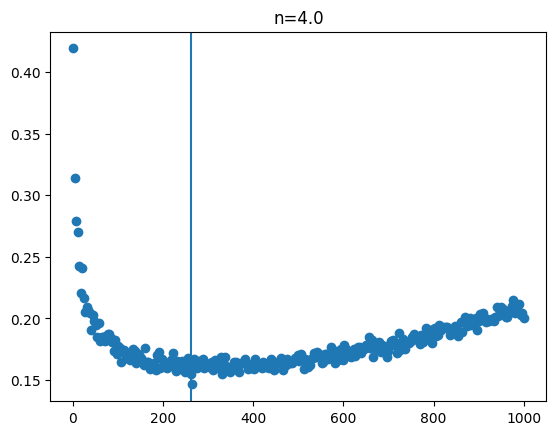

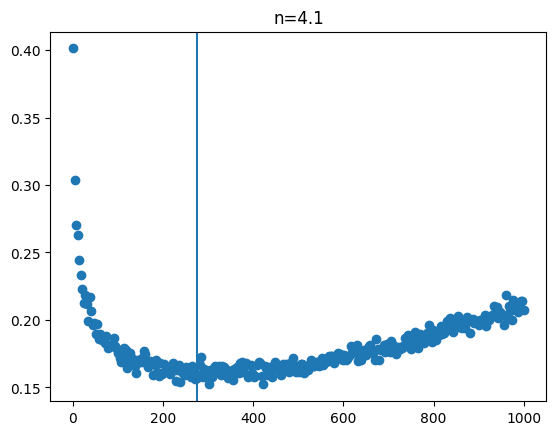

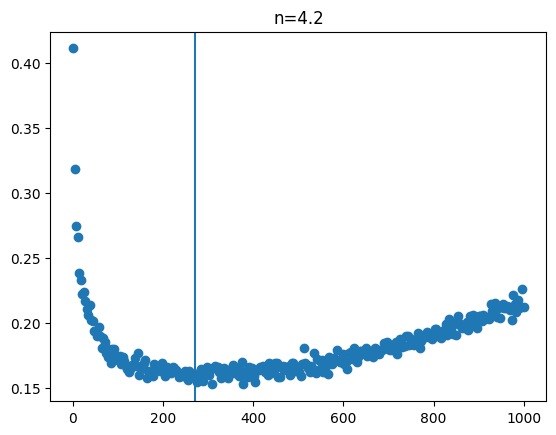

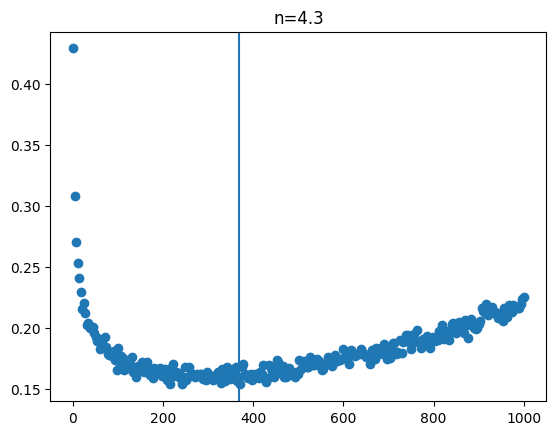

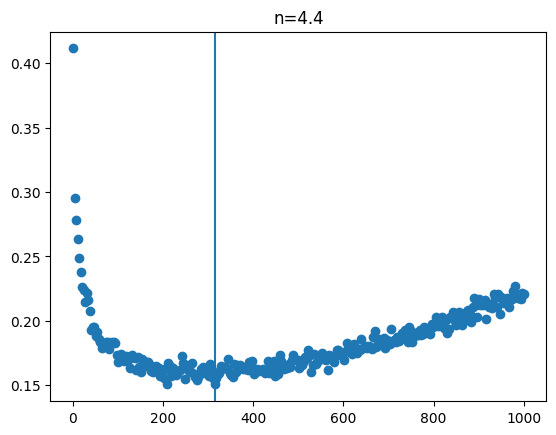

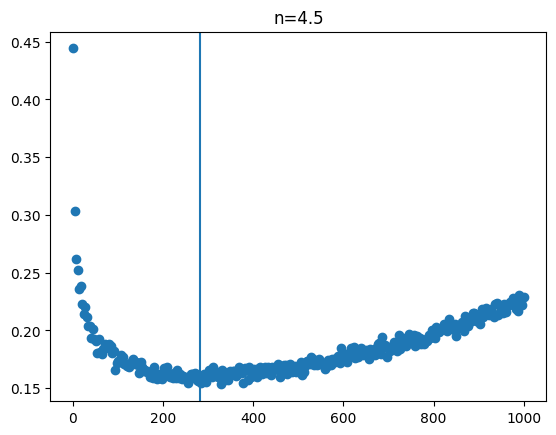

In [52]:
for n in n_axis: 
    mfpt = np.loadtxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/NStudy/New/mfpt(x_0={X_0},x_f={X_f},n={n}).txt")
    
    means = np.empty(len(mfpt)-2)
    for i in range(len(mfpt)):
        if(i<len(mfpt)-2):
            means[i]=np.mean([mfpt[i],mfpt[i+1],mfpt[i+2]])
    np.savetxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/NStudy/New/aopt_vs_n(x_0={X_0},x_f={X_f},n={n}).txt", [a_axis[np.argmin(np.array(means))+1]])

    plt.axvline(a_axis[np.argmin(np.array(means))+1])
    plt.scatter(a_axis, mfpt)
    plt.title(f'n={n}')
    plt.show()

#### Extracting the optimal value with parabola

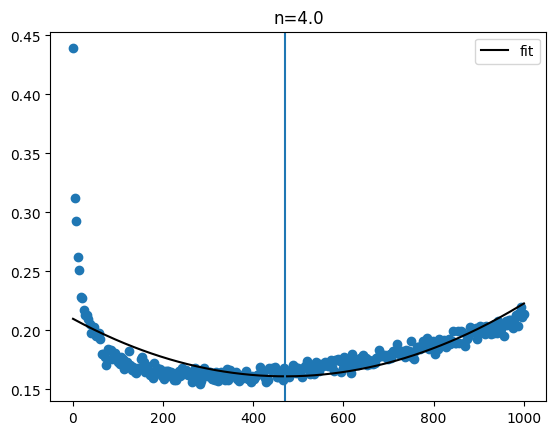

In [59]:
def parabola(x, a, b, c):
    return a * x**2 + b * x + c
for n in n_axis:
    mfpt = np.loadtxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/NStudy/New/mfpt(x_0={X_0},x_f={X_f},n={n}).txt")
    params, _ = curve_fit(parabola, a_axis, mfpt)
    a, b, c = params
    np.savetxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/NStudy/New/aopt_vs_n(x_0={X_0},x_f={X_f},n={n}).txt", [-b/(2*a)])
    plt.plot(a_axis, parabola(a_axis,a,b,c), color='black', label='fit')
    plt.legend()
    plt.axvline(-b/(2*a))
    plt.title(f'n={n}')
    plt.scatter(a_axis, mfpt)
    plt.show()

#### aopt vs n

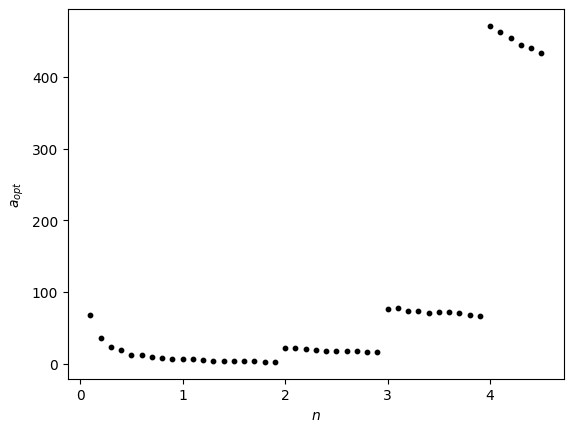

In [60]:
n      = np.round(np.linspace(0.1,4.5,45), decimals=3)
aopt   = []


x_0 = 0.0
x_f = 0.2


for i in n:
    aopt.append(np.loadtxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/NStudy/New/aopt_vs_n(x_0={X_0},x_f={X_f},n={i}).txt"))

plt.scatter(n,aopt, s=10, color='black')
plt.xlabel(r'$n$')
plt.ylabel(r'$a_{opt}$')
# plt.show()
plt.savefig(f'C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/aopt_vs_n.png', dpi=500)

### 2D Brownian motion

#### Position X(t) and Y(t)

[]

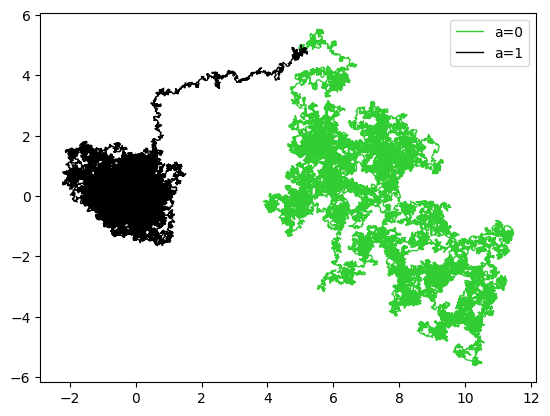

In [209]:
N    = 50000
M    = 2


X_0 = 5
Y_0 = 5

colors=['limegreen','black']

for j in range(M):
    X   = np.empty(N)
    Y   = np.empty(N)
    X[0]= X_0
    Y[0]= Y_0
    for i in range(N-1):
        X[i+1] = X[i] +0.5*(j)*h*dV(X[i],n)+np.sqrt(h*D)*np.random.normal(0,std)
        Y[i+1] = Y[i] +0.5*(j)*h*dV(Y[i],n)+np.sqrt(h*D)*np.random.normal(0,std)
#     if(X[j][i]**2+Y[j][i]**2>=R**2): break
    plt.plot(X, Y, linewidth=1,  color=colors[j], label=f'a={j}')
#     plt.plot(R*np.cos(np.linspace(0,np.pi)),R*np.sin(np.linspace(0,np.pi)), color='black')
#     plt.plot(R*np.cos(np.linspace(0,np.pi)),-R*np.sin(np.linspace(0,np.pi)), color='black')
plt.legend()
plt.plot()
plt.show()

### Save figure ###
# plt.savefig(f'C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/2D_a=0_and_a=1.png', dpi = 500)

#### Position R(t), X(t) and Y(t)

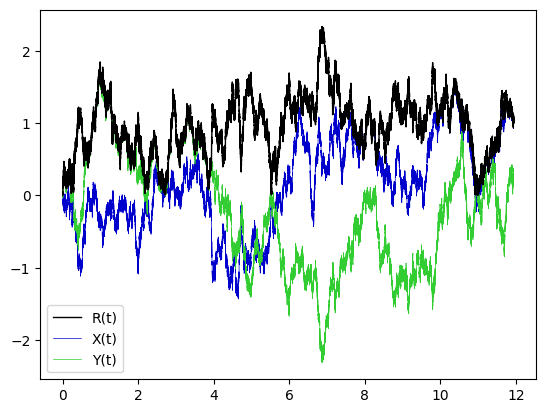

In [77]:
N    = 3000000
h    = 10**(-5.4)
M   = 1 
n   = 2   
X_0 = 0
Y_0 = 0     
std = 1                   
D   = 1  
a   = 1
R   = 1
time = np.linspace(0,h*N,N)

for j in range(M):
    X=np.empty((M,N))
    Y=np.empty((M,N))
    X[j][0]=X_0
    Y[j][0]=Y_0
    for i in range(N-1):
        X[j][i+1] = X[j][i] -0.5*n*a*h*(X[j][i]**(n-1))+np.sqrt(h*D)*np.random.normal(0,std)
        Y[j][i+1] = Y[j][i] -0.5*n*a*h*(Y[j][i]**(n-1))+np.sqrt(h*D)*np.random.normal(0,std)
#         if(X[j][i]**2+Y[j][i]**2>=R**2): break
    plt.plot(time, np.sqrt(X[j]**2+Y[j]**2), label='R(t)', color='black', linewidth=1, zorder=10)
    plt.plot(time, X[j], label='X(t)', color='mediumblue', linewidth=0.5)
    plt.plot(time, Y[j], label='Y(t)', color='limegreen', linewidth=0.5)
plt.legend()
# plt.show(

### Save figure ###
# plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/R(t).png', dpi=500)

#### Propagator

25000 iterations left
24000 iterations left
23000 iterations left
22000 iterations left
21000 iterations left
20000 iterations left
19000 iterations left
18000 iterations left
17000 iterations left
16000 iterations left
15000 iterations left
14000 iterations left
13000 iterations left
12000 iterations left
11000 iterations left
10000 iterations left
9000 iterations left
8000 iterations left
7000 iterations left
6000 iterations left
5000 iterations left
4000 iterations left
3000 iterations left
2000 iterations left
1000 iterations left


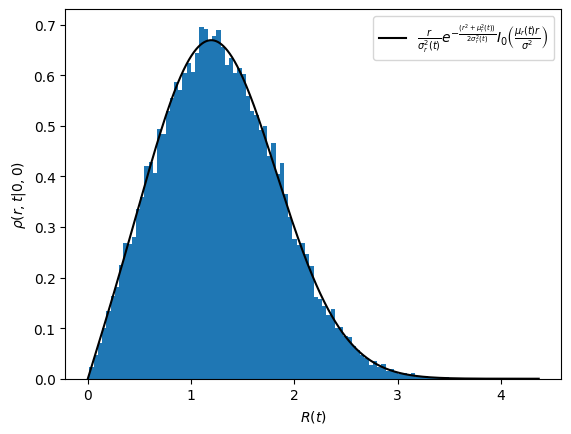

In [204]:
N    = 1000
h    = 10**(-3)
M   = 25000 
n   = 2   
X_0 = 2
Y_0 = 2     
std = 1                   
D   = 1  
a   = 1

sigma2 = D*(1-np.exp(-2*a*h*N))/2
mu2 = np.exp(-2*a*h*N)*(X_0**2+Y_0**2)


X=np.empty((M,N))
Y=np.empty((M,N))

for j in range(M):
    X[j][0]=X_0
    Y[j][0]=Y_0
    for i in range(N-1):
        X[j][i+1] = X[j][i] -0.5*a*n*h*(X[j][i]**(n-1))+np.sqrt(h*D)*np.random.normal(0,std)
        Y[j][i+1] = Y[j][i] -0.5*a*n*h*(Y[j][i]**(n-1))+np.sqrt(h*D)*np.random.normal(0,std)
    if(j%1000==0): print (f'{M-j} iterations left')

R = np.sqrt(X**2+Y**2)

R_axis = np.linspace(0,3.3,10000)
plt.hist(R[:,N-1], density = True, bins=90)
plt.plot(R_axis, R_axis*np.exp(-(R_axis**2/sigma2+mu2/sigma2)/2)*special.i0(np.sqrt(mu2*(R_axis**2)/sigma2**2))/sigma2, color='black', label=r'$\frac{r}{\sigma_r^{2}(t)}e^{-\frac{(r^2+\mu_r^2(t))}{2\sigma_r^2(t)}}I_0\left(\frac{\mu_r(t)r}{\sigma^{2}}\right)$')
plt.legend()
plt.xlabel(r'$R(t)$')
plt.ylabel(r'$\rho(r,t|0,0)$')
# plt.show()

### Save figure ###
plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/R_distribution_2.png', dpi=500)

#### Mean position

C:\Users\sergi\AppData\Local\Temp\ipykernel_27272\145277838.py:38: RuntimeWarning: invalid value encountered in multiply
  plt.plot(time, 0.5*np.exp(-(mu**2)/(4*sigma2))*np.sqrt(np.pi/(2*sigma2))*((mu**2+2*sigma2)*special.i0(mu**2/(4*sigma2))+(mu**2)*special.i1(mu**2/(4*sigma2))), label='Equation (50)', color='black')


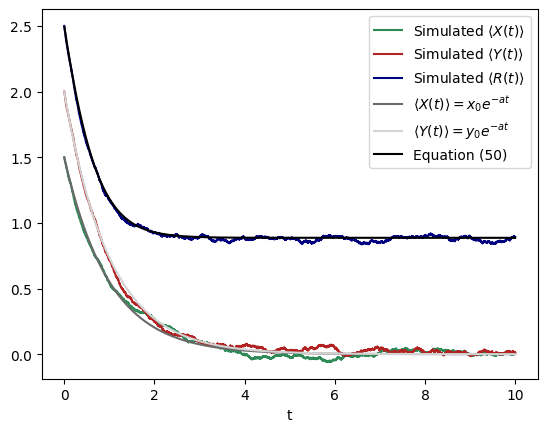

In [295]:
N    = 10000
h    = 10**(-3)
M   = 700
n   = 2   
X_0 = 1.5
Y_0 = 2     
std = 1                   
D   = 1  
a   = 1
R   = 1
time = np.linspace(h,h*N,N)

X=np.empty((M,N))
Y=np.empty((M,N))

for j in range(M):
    X[j][0]=X_0
    Y[j][0]=Y_0
    for i in range(N-1):
        X[j][i+1] = X[j][i] -0.5*n*a*h*(X[j][i]**(n-1))+np.sqrt(h*D)*np.random.normal(0,std)
        Y[j][i+1] = Y[j][i] -0.5*n*a*h*(Y[j][i]**(n-1))+np.sqrt(h*D)*np.random.normal(0,std)
Xmean = np.mean(X, axis = 0)
Ymean = np.mean(Y, axis = 0)
Rmean = np.mean(np.sqrt(X**2+Y**2), axis=0)
X2mean = np.mean(X**2, axis = 0)
Y2mean = np.mean(Y**2, axis = 0)
R2mean = np.mean(X**2+Y**2, axis=0)


mu = np.sqrt(X_0**2+Y_0**2)*np.exp(-a*time)
sigma2 = D*(1-np.exp(-2*a*time))/(2*a)

plt.plot(time, np.mean(X, axis=0), label='Simulated '+r'$\langle X(t)\rangle$', color='seagreen')
plt.plot(time, np.mean(Y, axis=0), label='Simulated '+r'$\langle Y(t)\rangle$', color='firebrick')
plt.plot(time, Rmean, label='Simulated '+r'$\langle R(t)\rangle$', color='navy')
plt.plot(time, X_0*np.exp(-a*time),label=r'$\langle X (t)\rangle = x_0e^{-at}$', color='dimgray')
plt.plot(time, Y_0*np.exp(-a*time),label=r'$\langle Y (t)\rangle = y_0e^{-at}$', color='lightgray')
plt.plot(time, 0.5*np.exp(-(mu**2)/(4*sigma2))*np.sqrt(np.pi/(2*sigma2))*((mu**2+2*sigma2)*special.i0(mu**2/(4*sigma2))+(mu**2)*special.i1(mu**2/(4*sigma2))), label='Equation (50)', color='black')


# plt.plot(time, X2mean, label='Simulated '+r'$\langle X(t)^2\rangle$', color='seagreen')
# plt.plot(time, Y2mean, label='Simulated '+r'$\langle Y(t)^2\rangle$', color='firebrick')
# plt.plot(time, R2mean, label='Simulated'+r'$\langle R(t)^{2}\rangle$', color='navy')
# plt.plot(time, (D/2*a)*(1-np.exp(-2*a*time))+X_0**2*np.exp(-2*a*time),label=r'$\langle X^{2} (t)\rangle = \frac{D}{2a}\left(1-e^{-2at}\right)+x_0^{2}e^{-2at}$', color='dimgray')
# plt.plot(time, (D/2*a)*(1-np.exp(-2*a*time))+Y_0**2*np.exp(-2*a*time),label=r'$\langle Y^{2} (t)\rangle = \frac{D}{2a}\left(1-e^{-2at}\right)+y_0^{2}e^{-2at}$', color='lightgray')
# plt.plot(time, mu**2+2*sigma2 ,label=r'$\langle R^{2} (t)\rangle = \mu_r^2(t)+2\sigma_r^2(t)$', color='black')

plt.legend()
plt.xlabel('t')
# plt.show()

### Save figure ###
plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/Mean_R(t).png', dpi=500)

#### First-passage time

Process a=0.25
Process a=0.375


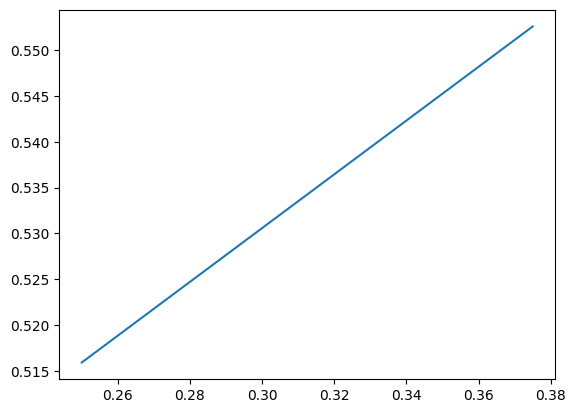

In [100]:
N   = 3000000
M   = 150
n   = 2   
X_0 = 0
Y_0 = 0     
h   = 10**(-5.4)           
std = 1                   
D   = 1  
R   = 1

a = np.round(np.linspace(0.25,0.375,2), decimals=3)
mfpsg = []


for k in a:
    fpsg = []
    print(f"Process a={k}")
    for j in range(M):
        X=np.empty((M,N))
        Y=np.empty((M,N))
        X[j][0]=X_0
        Y[j][0]=Y_0
        for i in range(N-1):
            X[j][i+1] = X[j][i] -0.5*n*k*h*(X[j][i]**(n-1))+np.sqrt(h*D)*np.random.normal(0,std)
            Y[j][i+1] = Y[j][i] -0.5*n*k*h*(Y[j][i]**(n-1))+np.sqrt(h*D)*np.random.normal(0,std)
            if(X[j][i]**2+Y[j][i]**2>=R**2):
                fpsg.append(float(i*h))
                break
    np.savetxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/2D_study/FPT_a={k}.txt", fpsg)
    mfpsg.append(np.mean(fpsg))
plt.plot(a,mfpsg)

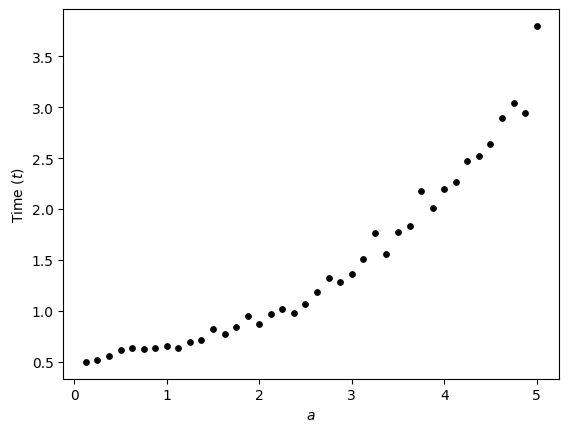

In [295]:
a = np.round(np.linspace(0.125,5,40), decimals=3)
mfpt = []
for i in a:
    fpt = np.loadtxt(f"C:/Users/sergi/OneDrive/Escritorio/TFM/txts/2D_study/FPT_a={i}.txt")
    mfpt.append(np.mean(fpt))

plt.scatter(a,mfpt, color='black', s=15)
plt.xlabel(r'$a$')
plt.ylabel('Time '+r'$(t)$')
# plt.show()
plt.savefig('C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/MFPT_vs_a_R.png', dpi = 500)

#### Visualization of the first-passage time

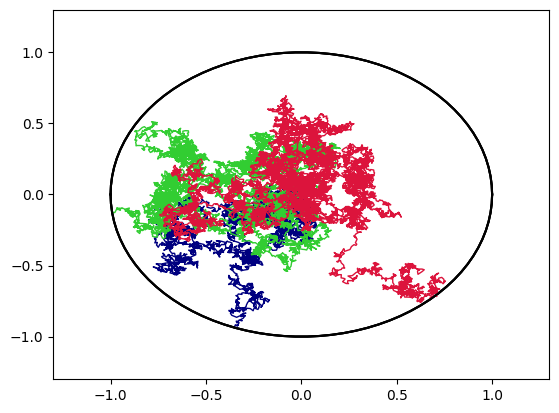

In [291]:
N    = 100000
M    = 3
h    = 10**(-4) 

X_0 = 0
Y_0 = 0

R   =   1

colors = ['navy', 'limegreen', 'crimson']

for j in range(M):
    X   = np.empty(N)
    Y   = np.empty(N)
    X[0]= X_0
    Y[0]= Y_0
    for i in range(N-1):
        X[i+1] = X[i] +0.5*a*h*dV(X[i],n)+np.sqrt(h*D)*np.random.normal(0,std)
        Y[i+1] = Y[i] +0.5*a*h*dV(Y[i],n)+np.sqrt(h*D)*np.random.normal(0,std)
        if(X[i+1]**2+Y[i+1]**2>=R**2): break
    plt.plot(X, Y, linewidth=1, color=colors[j])
    plt.plot(R*np.cos(np.linspace(0,np.pi)),R*np.sin(np.linspace(0,np.pi)), color='black')
    plt.plot(R*np.cos(np.linspace(0,np.pi)),-R*np.sin(np.linspace(0,np.pi)), color='black')
plt.xlim(-R*1.3,R*1.3)
plt.ylim(-R*1.3,R*1.3)
plt.plot()
# plt.show()
plt.savefig(f'C:/Users/sergi/OneDrive/Escritorio/TFM/Plots/FPT_Visualization.png', dpi = 500)